<a href="https://colab.research.google.com/github/fawaid98/portfolio/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from codecs import decode
import struct
import numpy as np
import pandas as pd
from sympy import symbols, diff, Matrix, lambdify
from numpy.random import rand, randint
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [13]:
x = symbols('x')
y = symbols('y')
fxy = x**2*y**2 + 1

fxy

x**2*y**2 + 1

In [14]:
#KONVERSI
def bin2float(b):
  return struct.unpack('>f', int2bit(int(b, 2), 4))[0]

def int2bit(n, length):
  return decode('%%0%fx' % (length << 1) % n, 'hex')[-length:]

def float2bin(value):
  return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', value))

def str2int(string):
    li = []
    li[:0] = string
    lis = [int(i) for i in li]
    return lis

def list2str(s):
  str1 = ''.join(map(str, s))
  return str1

In [16]:
bb = -3
ba = 3
m = 32
#RANDOM INITIAL POINT
print('RANDOM INITIAL POINT')
initial_x = np.random.uniform(bb, ba, 5)
initial_y = np.random.uniform(bb, ba, 5)
xy = []
for i in range(0, len(initial_x)):
  x_y = [initial_x[i], initial_y[i]]
  xy.append(x_y)
print(f'Titik Awal: \n{np.array(xy)}')

#ENCODE
print('\nENCODE')
print('Populasi Awal: ')
pop = []
for i in range(0,len(initial_x)):
  pop_x = float2bin(initial_x[i])
  pop_y = float2bin(initial_y[i])
  popi = (pop_x[:]+pop_y[:])
  pop.append(popi)
  print(f'krom_{i+1} = {pop[i]}')

f_xy = []
opt_p = []
x_i = []
y_i = []
for j in range(0, 10):
  print('\n--------------------------------------------------')
  print(f'Iterasi ke-{j+1}')
  print('--------------------------------------------------\n')

  #FITNESS
  print('FITNESS')
  obj = []
  for i in range(0,len(pop)):
    objektif = bin2float(pop[i][:m])**2*bin2float(pop[i][m:])**2 + 1
    obj.append(objektif)

  print(f'nilai objektif = {obj}')

  fit = []
  for i in range(0,len(obj)):
    fitness = 1/obj[i]
    fit.append(fitness)
  total = np.sum(fit)
  p_i = fit/total
  print(f'probability = {p_i.tolist()}')

  #SELEKSI
  print('\nSELEKSI')
  #Parent 1
  print('Seleksi Parent 1')
  p_kum = []
  for i in range(0, len(p_i)):
    kum = sum(p_i[0:i+1])
    p_kum.append(kum)
  df = pd.DataFrame(data={'Kromosom':pop, 'P':fit, 'Prob':p_kum})
  print(df)

  r_s = rand()
  print(f'selection prob. = {r_s}')

  if r_s <= df['Prob'][0]:
    par1 = df['Kromosom'][0]
  elif r_s <= df['Prob'][1]:
    par1 = df['Kromosom'][1]
  elif r_s <= df['Prob'][2]:
    par1 = df['Kromosom'][2]
  elif r_s <= df['Prob'][3]:
    par1 = df['Kromosom'][3]
  else: par1 = df['Kromosom'][4]
  print(f'parent 1 = {par1}')

  #Parent 2
  print('\nSeleksi Parent 2')
  df2 = df.loc[(df['Kromosom'] != par1)]
  df2 = df2.reindex([0,1,2,3,4])
  df2 = df2.fillna(0)
  df2.sort_values(by=['Prob'], ascending=True, ignore_index=True, inplace=True)
  tot2 = sum(df2['Prob'])
  p_n = df2['Prob']/tot2
  p_k = []
  for i in range(0, len(p_n)):
    k = sum(p_n[0:i+1])
    p_k.append(k)
  df2['Prob'] = p_k
  print(df2)
  r_s = rand()
  print(f'selection prob. = {r_s}')

  if r_s <= df2['Prob'][0]:
    par2 = df2['Kromosom'][0]
  elif r_s <= df2['Prob'][1]:
    par2 = df2['Kromosom'][1]
  elif r_s <= df2['Prob'][2]:
    par2 = df2['Kromosom'][2]
  elif r_s <= df2['Prob'][3]:
    par2 = df2['Kromosom'][3]
  else: par2 = df2['Kromosom'][4]
  print(f'parent 2 = {par2}')


  #CROSSOVER
  print('\nCROSSOVER')
  new1 = par1[:m]+par2[m:]
  new2 = par2[:m]+par1[m:]
  print(f'new_gen1 = {new1}')
  print(f'new_gen2 = {new2}')

  df.sort_values(by=['P'], ascending=False, ignore_index=True, inplace=True)
  for i in range(0, len(pop)):
    if pop[i] == df['Kromosom'][4]:
      pop[i] = new1
    elif pop [i] == df['Kromosom'][3]:
      pop[i] = new2
    else: pop[i]
  print('\nnew pop')
  for i in range(0, len(pop)):
    print(f'krom_{i+1} = {pop[i]}')

  #MUTATION
  print('\nMUTATION')
  n = 64*5*0.05
  print(f'jumlah mutasi gen = {n}')
  r_m = randint(0,(64*5),int(n))
  print(f'lokasi mutasi = {r_m}')
  popa = str2int(''.join(pop))
  for i in range(0,len(r_m)):
    if popa[r_m[i]] == 0:
      popa[r_m[i]] = 1
    else: popa[r_m[i]] = 0
  print('\nnew pop')
  pop = []
  for i in range(0, 5):
    pops = popa[(i*64):((i+1)*64)]
    pop.append(list2str(pops))
    print(f'krom_{i+1} = {pop[i]}')

  #DECODE
  print('\nDECODE')
  obj = []
  for i in range(0,len(pop)):
    objektif = (bin2float(pop[i][:m])**2)*(bin2float(pop[i][m:])**2) + 1
    if objektif != objektif:
      objektif = np.inf
    else: objektif
    obj.append(objektif)

  dst = [] 
  for i in range(0,len(obj)):
    dis = np.abs(obj[i] - 1)
    dst.append(dis)

  df3 = pd. DataFrame(data={'Kromosom':pop, 'Obj':obj, 'Dist':dst})
  df3.sort_values(by=['Dist'], ascending=True, ignore_index=True, inplace=True)
  opt = df3['Dist'][0]
  opt_val = df3['Obj'][0]
  print(f'Nilai Optimum = {opt_val}')

  f_xy.append(opt_val)

  opt_krom = df3['Kromosom'][0]

  for i in range(0,len(pop)):
    if pop[i] == opt_krom:
      print(f'Kromosom Optimum = krom_{i+1}')
    else: pop[i]

  point = [bin2float(opt_krom[:m]), bin2float(opt_krom[m:])]
  print(f'Titik Optimum = {point}')
  opt_p.append(point)
  xi = point[0]
  yi = point[1]
  x_i.append(xi)
  y_i.append(yi)

  if opt_val == 1.0:
    print(f'Jumlah Generasi = {j+1}')
    break 

RANDOM INITIAL POINT
Titik Awal: 
[[ 1.94149702 -2.24644943]
 [-0.75851528 -2.87089977]
 [ 2.72186794 -0.31172123]
 [ 2.70628725  2.31372037]
 [-1.81828411  2.97849983]]

ENCODE
Populasi Awal: 
krom_1 = 0011111111111000100000101111100111000000000011111100010111010100
krom_2 = 1011111101000010001011100000111111000000001101111011110011010010
krom_3 = 0100000000101110001100110001011010111110100111111001100111101101
krom_4 = 0100000000101101001100111100111101000000000101000001001111111111
krom_5 = 1011111111101000101111011000100101000000001111101001111110111110

--------------------------------------------------
Iterasi ke-1
--------------------------------------------------

FITNESS
nilai objektif = [20.022462748418693, 5.742034636357302, 1.7198912742898629, 40.20753377561137, 30.330447185488712]
probability = [0.057847531272665634, 0.20171422036731515, 0.6734437561892803, 0.028806791445077175, 0.03818770072566176]

SELEKSI
Seleksi Parent 1
                                            Krom

In [17]:
#Resume Result
df5=pd.DataFrame(data={'Generasi':range(1,len(f_xy)+1), '(x,y)':opt_p, 'f(x,y)':f_xy})
print(df5)

   Generasi                                        (x,y)    f(x,y)
0         1    [2.721867561340332, -0.31074467301368713]  1.715388
1         2    [-0.04754131659865379, 2.994123935699463]  1.020262
2         3    [-2.721806526184082, -0.4044870436191559]  2.212059
3         4  [-2.721684455871582, 2.066653449905194e-36]  1.000000


Text(0, 0.5, 'f(x,y)')

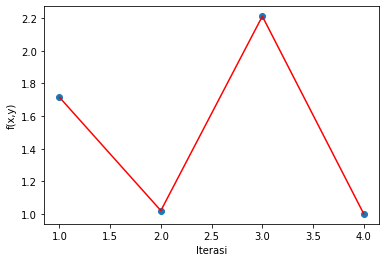

In [18]:
#Plot Konvergensi
plt.plot(range(1,len(f_xy)+1), f_xy, '-r')
plt.scatter(range(1,len(f_xy)+1), f_xy)
plt.xlabel('Iterasi')
plt.ylabel('f(x,y)')

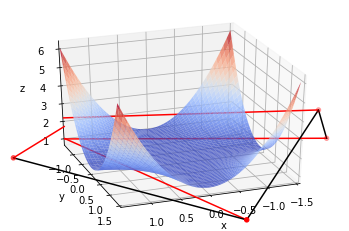

In [19]:
#Plot Tracing 3D
fig = plt.figure()
ax = plt.axes(projection ="3d")
dim = 1.5
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim((-dim,dim-0.05))
ax.set_ylim((-dim+0.05,dim))

X = np.linspace(-dim, dim, 100)
Y = np.linspace(-dim, dim, 100)
X, Y = np.meshgrid(X, Y)
F = lambdify((x,y),fxy)
Z = F(X, Y)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=.8, linewidth=0)

for i in range(0,len(f_xy)):
  X1 = [x_i[i], dim]
  Y1 = [y_i[i], -dim]
  Z1 = [f_xy[i], f_xy[i]]
  ax.plot(X1, Y1, Z1, c='red')

ax.scatter3D(x_i, y_i, f_xy, color='red')
ax.plot(x_i, y_i, f_xy, c='black')
ax.view_init(30, 70)